In [3]:
from constraints import *
from helper import *

## Testing ConvexConstraints and linear_to_polytope method

In [4]:
# TODO: Test ConvexConstraints

x_bounds = BoxConstraints(-1,1)
y_bounds = BoxConstraints(-1,1)
var_bounds = {"x":x_bounds, "y":y_bounds}
variables = make_variables(var_bounds)
x,y = variables["x"], variables["y"]
fn = lambda v: v["x"]**2 + v["y"]**2
gradient_fn = lambda v: {"x":2*v["x"], "y":2*v["y"]}

x = ConvexConstraints(variables, var_bounds, fn, gradient_fn, convex=True)
x.lower.coeffs

{'x': 2.0, 'y': 2.0, '_const': -2.0}

In [5]:
x1 = LinearConstraints(Line({"x":1,"y":1,"_const":1}), Line({"x":2,"y":3,"_const":4}), var_bounds)
y1 = LinearConstraints(Line({"x":3,"y":5,"_const":-2}), Line({"x":-5,"y":7,"_const":10}), var_bounds)
variables = {"x1":x1, "y1":y1}
order = ["x1","y1"]
A, b, proj_dim = linear_to_polytope(var_bounds,variables,order)
print(A)
print(A.shape)
print(b)
print(b.shape)
print(proj_dim)

[[ 1  0  0  0]
 [-1  0  0  0]
 [ 0  1  0  0]
 [ 0 -1  0  0]
 [ 1  1 -1  0]
 [-2 -3  1  0]
 [ 3  5  0 -1]
 [ 5 -7  0  1]]
(8, 4)
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 4]
 [ 2]
 [10]]
(8, 1)
[2, 3]


## Testing Cloud Visualization from Polytope Sampling

### 2D Case

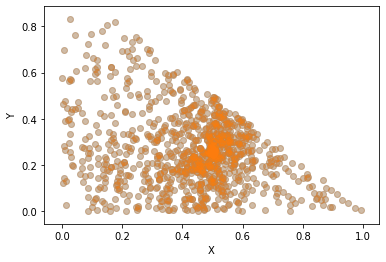

In [6]:
A = np.array([[-1,0],[0,-1],[1,1]])
b = np.array([[0,0,1]]).T
initial_point = np.array([[0.5,0.25]]).T
projected_points, points = sample_polytope(initial_point, 1000, A, b, [0,1])
compare_clouds(projected_points,projected_points)

### 3D Case

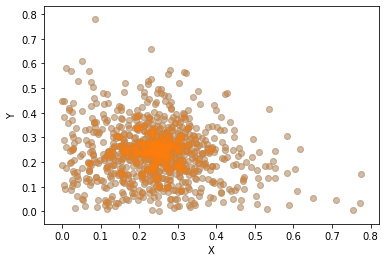

In [7]:
A = np.array([[-1,0,0],[0,-1,0],[0,0,-1],[1,1,1]])
b = np.array([[0,0,0,1]]).T
initial_point = np.array([[0.25,0.25,0.25]]).T
projected_points, points = sample_polytope(initial_point, 1000, A, b, [0,1])
compare_clouds(projected_points,projected_points)